# Machine Learning with XGBoost: Laptop Price Prediction

In [1]:
# Importing a library for mathematical operations.

import numpy as np

# Importing a library for data manipulation.

import pandas as pd

# Importing libraries for data visualization.

import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning.

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

## Data Collection

In [2]:
# Reading data into a Pandas DataFrame.

data = pd.read_csv("Data.csv")

In [3]:
# Printing first five rows of data.

data.head()

,Brand,Model,Type,Screen Size,Screen Resolution,RAM,Operating System,CPU Brand,CPU Model,CPU Rate,SSD,HDD,GPU Brand,GPU Model,Price
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,Intel,HD Graphics 620,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,AMD,Radeon R5,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,Nvidia,GeForce MX150,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,Intel,UHD Graphics 620,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,Intel,HD Graphics 620,393.9


## Data Cleaning

In [4]:
# Printing number of duplicate rows.

data.duplicated().sum()

18

In [5]:
# Dropping duplicate rows.

data.drop_duplicates(inplace=True)

In [6]:
# Printing number of missing values in each column.

data.isna().sum()

Brand                0
Model                0
Type                 0
Screen Size          0
Screen Resolution    0
RAM                  0
Operating System     0
CPU Brand            0
CPU Model            0
CPU Rate             0
SSD                  0
HDD                  0
GPU Brand            0
GPU Model            0
Price                0
dtype: int64

In [7]:
# Printing a concise summary of data.

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 0 to 1127
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1128 non-null   object 
 1   Model              1128 non-null   object 
 2   Type               1128 non-null   object 
 3   Screen Size        1128 non-null   float64
 4   Screen Resolution  1128 non-null   object 
 5   RAM                1128 non-null   object 
 6   Operating System   1128 non-null   object 
 7   CPU Brand          1128 non-null   object 
 8   CPU Model          1128 non-null   object 
 9   CPU Rate           1128 non-null   object 
 10  SSD                1128 non-null   int64  
 11  HDD                1128 non-null   int64  
 12  GPU Brand          1128 non-null   object 
 13  GPU Model          1128 non-null   object 
 14  Price              1128 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 141.0+ KB


## Data Analysis

### Analysis 1:

Analyzing the distribution of the number and the price of laptops for various brands.

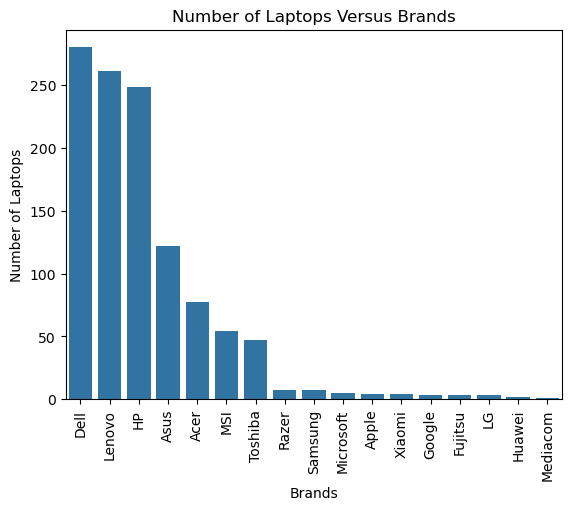

In [8]:
# Plotting a bar plot for number of laptops versus brands.

sns.barplot(data["Brand"].value_counts())
plt.title("Number of Laptops Versus Brands")
plt.xlabel("Brands")
plt.ylabel("Number of Laptops")
plt.xticks(rotation="vertical")
plt.show()

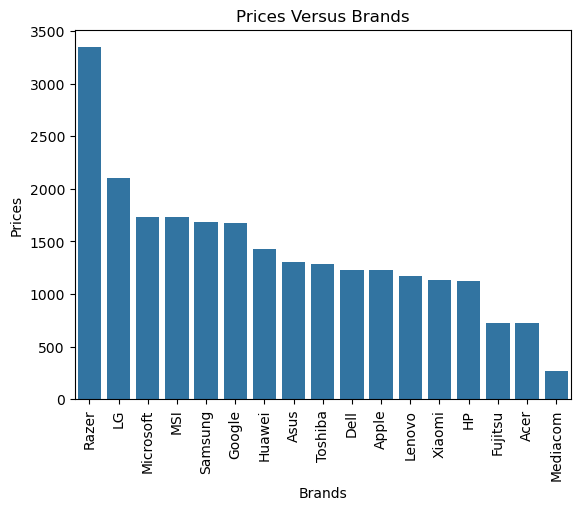

In [9]:
# Plotting a bar plot for prices versus brands.

sns.barplot(data.groupby("Brand")["Price"].mean().sort_values(ascending=False))
plt.title("Prices Versus Brands")
plt.xlabel("Brands")
plt.ylabel("Prices")
plt.xticks(rotation="vertical")
plt.show()

### Conclusion 1:

Laptops from Dell are the highest in number and laptops from Razer are the highest in price while laptops from Mediacom are the lowest in number and price.

### Analysis 2:

Analyzing the distribution of the number and the price of laptops for various types.

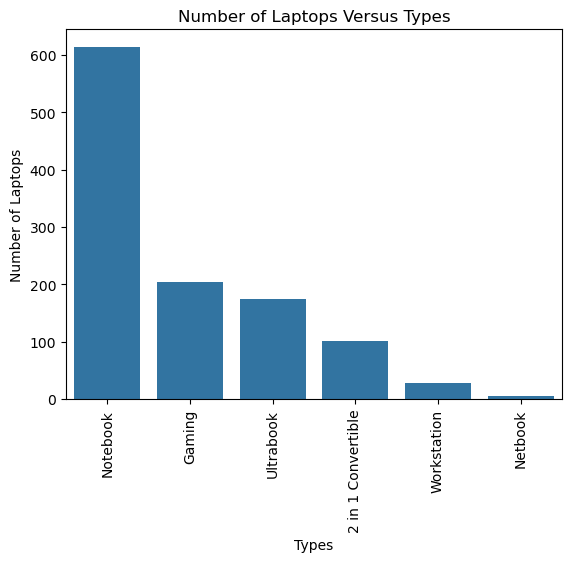

In [10]:
# Plotting a bar plot for number of laptops versus types.

sns.barplot(data["Type"].value_counts())
plt.title("Number of Laptops Versus Types")
plt.xlabel("Types")
plt.ylabel("Number of Laptops")
plt.xticks(rotation="vertical")
plt.show()

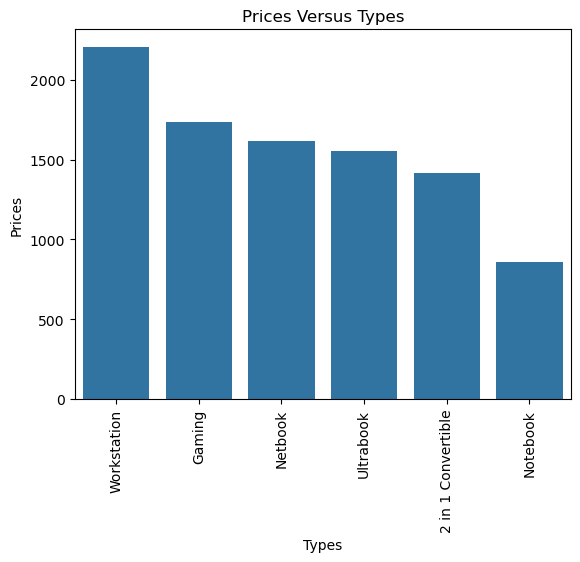

In [11]:
# Plotting a bar plot for prices versus types.

sns.barplot(data.groupby("Type")["Price"].mean().sort_values(ascending=False))
plt.title("Prices Versus Types")
plt.xlabel("Types")
plt.ylabel("Prices")
plt.xticks(rotation="vertical")
plt.show()

### Conclusion 2:

Notebook laptops are the highest in number and workstation laptops are the highest in price while netbook laptops are the lowest in number and notebook laptops are the lowest in price.

### Analysis 3:

Analyzing the distribution of the number of laptops with various operating systems.

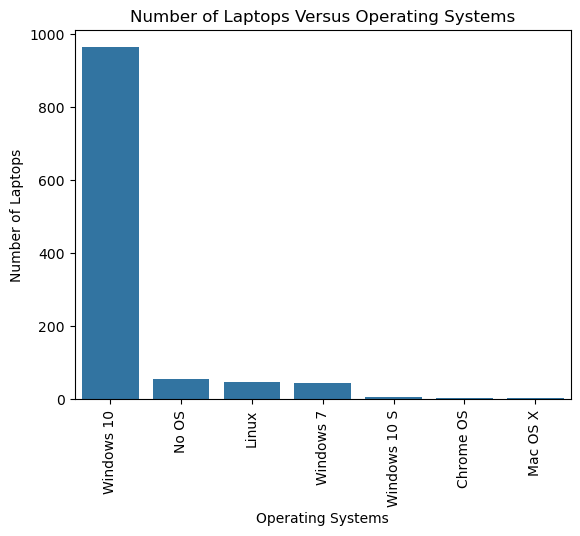

In [12]:
# Plotting a bar plot for number of laptops versus operating systems.

sns.barplot(data["Operating System"].value_counts())
plt.title("Number of Laptops Versus Operating Systems")
plt.xlabel("Operating Systems")
plt.ylabel("Number of Laptops")
plt.xticks(rotation="vertical")
plt.show()

### Conclusion 3:

Laptops with Windows 10 are the highest in number while laptops with Chrome OS and Mac OS X are the lowest in number.

### Analysis 4:

Analyzing the distribution of the number and the price of laptops with various CPUs.

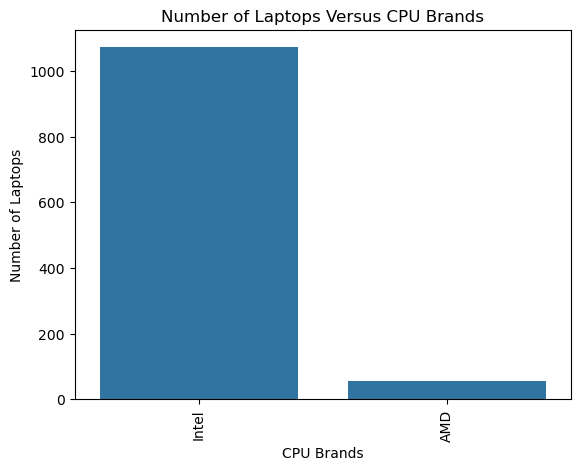

In [13]:
# Plotting a bar plot for number of laptops versus CPU brands.

sns.barplot(data["CPU Brand"].value_counts())
plt.title("Number of Laptops Versus CPU Brands")
plt.xlabel("CPU Brands")
plt.ylabel("Number of Laptops")
plt.xticks(rotation="vertical")
plt.show()

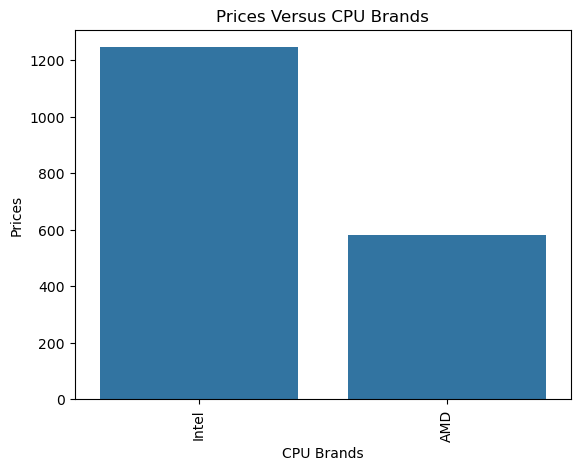

In [14]:
# Plotting a bar plot for prices versus CPU brands.

sns.barplot(data.groupby("CPU Brand")["Price"].mean().sort_values(ascending=False))
plt.title("Prices Versus CPU Brands")
plt.xlabel("CPU Brands")
plt.ylabel("Prices")
plt.xticks(rotation="vertical")
plt.show()

### Conclusion 4:

Laptops with Intel CPUs are higher in number and price than laptops with AMD CPUs.

### Analysis 5:

Analyzing the distribution of the number and the price of laptops with various GPUs.

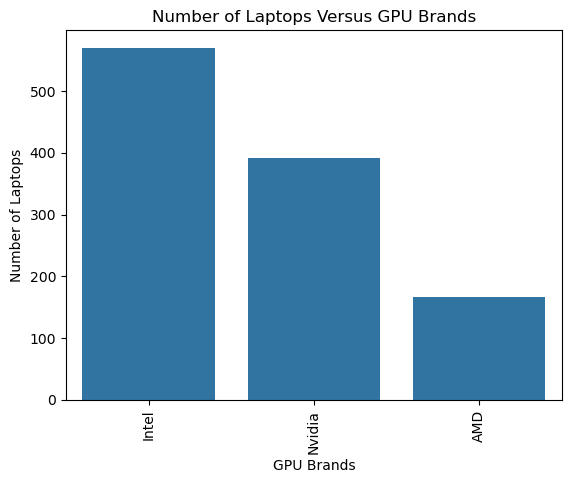

In [15]:
# Plotting a bar plot for number of laptops versus GPU brands.

sns.barplot(data["GPU Brand"].value_counts())
plt.title("Number of Laptops Versus GPU Brands")
plt.xlabel("GPU Brands")
plt.ylabel("Number of Laptops")
plt.xticks(rotation="vertical")
plt.show()

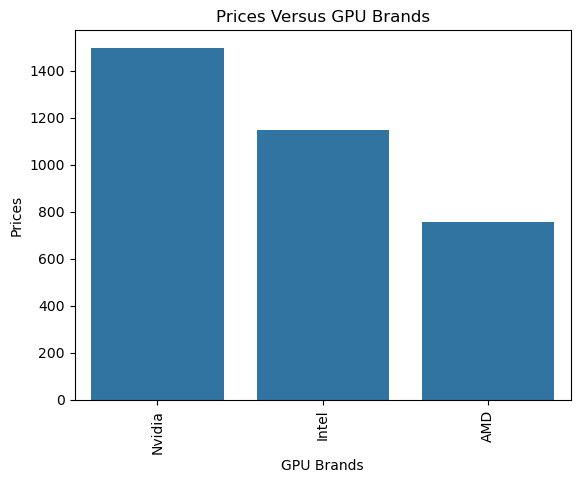

In [16]:
# Plotting a bar plot for prices versus GPU brands.

sns.barplot(data.groupby("GPU Brand")["Price"].mean().sort_values(ascending=False))
plt.title("Prices Versus GPU Brands")
plt.xlabel("GPU Brands")
plt.ylabel("Prices")
plt.xticks(rotation="vertical")
plt.show()

### Conclusion 5:

Laptops with Intel GPUs are the highest in number and laptops with Nvidia GPUs are the highest in price while laptops with AMD GPUs are the lowest in number and price.

## Feature Engineering

In [17]:
# Building a label encoder.

encoder = LabelEncoder()

In [18]:
# Encoding labels for categorical columns.

for column in data.select_dtypes("object").columns:
    
    data[column] = encoder.fit_transform(data[column])

## Feature Selection

In [19]:
# Assigning feature matrix.

X = np.array(data.drop("Price", axis=1))

# Assigning target vector.

y = np.array(data["Price"])

In [20]:
# Reshaping target vector.

y = y.reshape(-1, 1)

In [21]:
# Printing feature matrix shape.

print("Feature Matrix Shape:", X.shape)

# Printing target vector shape.

print("Target Vector Shape:", y.shape)

Feature Matrix Shape: (1128, 14)
Target Vector Shape: (1128, 1)


## Data Standardization

In [22]:
# Building a scaler to standardize data.

scaler = StandardScaler()

In [23]:
# Transforming feature matrix.

X = scaler.fit_transform(X)

# Transforming target vector.

y = scaler.fit_transform(y)

## Machine Learning

In [24]:
# Splitting data into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# Building a XGBoost regressor model.

model = XGBRegressor()

# Fitting model on training set.

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
# Predicting values for testing set.

y_prediction = model.predict(X_test)

In [27]:
# Printing coefficient of determination of prediction.

print("Accuracy Score:", model.score(X_test, y_test))

# Printing R^2 regression score.

print("R^2 Score:", r2_score(y_test, y_prediction))

# Printing mean absolute error.

print("Mean Absolute Error:", mean_absolute_error(y_test, y_prediction))

# Printing mean absolute percentage error.

print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_prediction))

# Printing mean squared error.

print("Mean Squared Error:", mean_squared_error(y_test, y_prediction))

# Printing root mean squared error.

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_prediction)))

Accuracy Score: 0.8532450520650812
R^2 Score: 0.8532450520650812
Mean Absolute Error: 0.2600246827773585
Mean Absolute Percentage Error: 1.5117856195827095
Mean Squared Error: 0.1345337607970377
Root Mean Squared Error: 0.366788441471426


In [28]:
# Reshaping predicted values.

y_prediction = y_prediction.reshape(-1, 1)

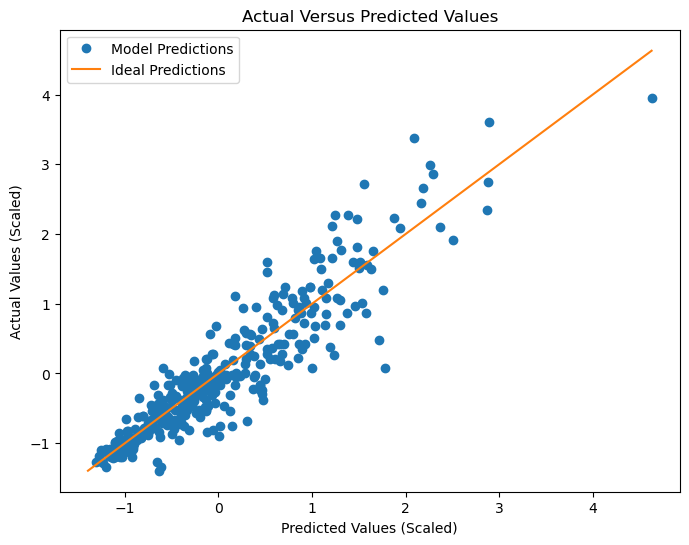

In [29]:
# Plotting a scatter plot for actual versus predicted values.

plt.figure(figsize=(8, 6))
plt.plot(y_prediction, y_test, "o", label="Model Predictions")
minimum = min(min(y_prediction), min(y_test))
maximum = max(max(y_prediction), max(y_test))
plt.plot([minimum, maximum], [minimum, maximum], label="Ideal Predictions")
plt.title("Actual Versus Predicted Values")
plt.xlabel("Predicted Values (Scaled)")
plt.ylabel("Actual Values (Scaled)")
plt.legend()
plt.show()

In [30]:
# Transforming predicted values to original representation.

y_prediction_original = scaler.inverse_transform(y_prediction)

# Transforming actual values to original representation.

y_test_original = scaler.inverse_transform(y_test)

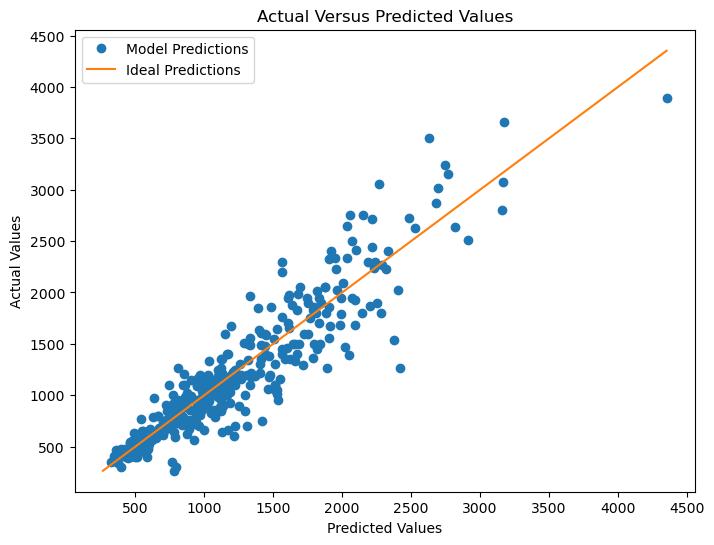

In [31]:
# Plotting a scatter plot for actual versus predicted values.

plt.figure(figsize=(8, 6))
plt.plot(y_prediction_original, y_test_original, "o", label="Model Predictions")
minimum = min(min(y_prediction_original), min(y_test_original))
maximum = max(max(y_prediction_original), max(y_test_original))
plt.plot([minimum, maximum], [minimum, maximum], label="Ideal Predictions")
plt.title("Actual Versus Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()